# EDA within housing market

**Goal of this notebook**
- Find top houses for Thomas Hansen within the King County house prices dataset.


**Stakeholder Information: Thomas Hansen (Buyer)**
- 5 kids
- no money
- wants nice (social) neighbourhood
- Timing?
- Location?

**Content of this notebook:**
- exploratory data analysis (EDA) regarding above factors
    - Get an overview of the data
    - Filter data regarding Thomas Hansens needs
    - Creating a scoring system to show top10 houses for Thomas Hansen
- plotting the results
    - a map as geographical overview containing the score and further relevant info
    - Extra: bar charts for analysis of singular factors
    
FYI: Code is hidden as default. For further info, click on ...

Importing necessary packages

In [492]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt
import numpy as np

import plotly.graph_objects as go
#import plotly.figure_factory as ff
#import plotly.subplots as psp


from scipy import stats

%matplotlib inline

#Display all columns in following lists
pd.set_option('display.max_columns', None)

**Getting an overview of the data.**

In [493]:
#Read CSV file with relevant data
data = pd.read_csv('../data/King_County_House_prices_dataset.csv')

#Describe percentiles and other key values to get an overview of the data
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Data contains:
- ID
- Date (not used)
- Price
- Bedrooms
- Bathrooms
- Square Foot Living Space
- Square Foot Lot
- Floors
- Waterfront (not used)
- View (not used)
- Condition of the House (from 1-5)
- Grade (scoring system by King County from 3-13)
- Square foot above (not used)
- Square foot basement (not used)
- year built (not used)
- year renovated (not used)
- zipcode
- latitude (geographical data)
- longitude (geographical data)
- Square foot living of nearest 15 neighbours (not used)
- Square foot lot of nearest 15 neighbours (not used)

Getting an overview of calculated values.
Important:
- mean
- minimum
- maximum
- quartiles (25%, 75%)

In [494]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Stakeholder interests:
- No money = Filter by price and get only relative cheap houses
- 5 kids = Filter for houses with many bedrooms and many bathrooms and higher than average living space

**Define key values according to above interests and filter the data accordingly:**
- First quartile of price is at 322,000. Filter data according to cheapest 25%.
- Third quartile of bedrooms is at 4. Filter data according to above 75% percentile.
- Third quartile of bathrooms is at 2.5. Filter data according to above 75% percentile.
- Third quartile of sqft_living is at 2550. Filter data according to above 75% percentile.

In [495]:
low25_bighouse = data.query('price <= price.describe()["25%"] and bedrooms >= bedrooms.describe()["75%"] and bathrooms >= bathrooms.describe()["75%"] and sqft_living >= sqft_living.describe()["75%"]')
low25_bighouse



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
157,8731900200,8/7/2014,320000.0,4,2.75,2640,7500,1.0,0.0,0.0,3,8,1620,1020.0,1967,0.0,98023,47.3135,-122.369,1980,7875
232,9264902050,11/21/2014,315000.0,6,2.75,2940,7350,1.0,0.0,0.0,3,8,1780,1160.0,1978,0.0,98023,47.3103,-122.339,2120,8236
1255,3832711040,4/24/2015,321000.0,5,2.75,3030,7000,1.0,0.0,0.0,4,7,1540,1490.0,1978,NaN,98032,47.3661,-122.280,1790,7330
1853,6699000810,8/13/2014,315000.0,5,2.50,3220,5751,2.0,0.0,0.0,3,8,3220,0.0,2002,0.0,98042,47.3717,-122.104,2740,5500
1924,7316400070,9/25/2014,255000.0,5,3.75,2800,9900,1.0,0.0,0.0,3,7,2800,0.0,1964,NaN,98023,47.3190,-122.344,1700,13200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20377,3021059304,9/17/2014,300000.0,6,3.00,2744,9926,2.0,0.0,0.0,3,7,2744,0.0,2006,NaN,98002,47.2773,-122.216,2470,9926
20636,7883603648,5/22/2014,300000.0,5,2.50,2760,6000,2.0,0.0,0.0,3,8,2760,0.0,2006,0.0,98108,47.5289,-122.321,1360,6000
20912,53500760,12/8/2014,287000.0,4,2.50,2660,4082,2.0,NaN,0.0,3,7,2660,0.0,2010,0.0,98042,47.3414,-122.055,2390,4876
21139,4233800020,10/8/2014,270000.0,4,2.50,2701,5821,2.0,0.0,0.0,3,7,2701,0.0,2013,NaN,98092,47.2873,-122.177,2566,5843


**With the above defined key values, we have 66 of 21597 houses left.**

As next step we should try to define the next open question of our stakeholder:
1. What is a nice (and social) neighbourhood? (And to which location does this lead?)

The houses in the neighbourhood  are only defined through two values:
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

**This does not help with our question. We should try to create new data.**

- The word "social" indicates, that our stakeholder would like to have a higher quantity of houses in the area, communal activities and playgrounds for the kids. 
This can be analyzed manually on a later state in the street map

- The word "nice" indicates, that the local houses (houses with same zip code) should be of good quality. 
We could check this for all local houses via the "grade" column, based on King County grading system.
The higher the grade for nearby houses, the better (lowest is 3, highest is 13). 
Here we could use the average grade and condition for nearby houses.
We add the average grade and average condition within the zipcode.

In [508]:
#Want nice (social) neighbourhood: Analyse neighbourhood data and get nice (social) data
#Get the mean for grade same zip code

#Create a new list with zip_counter (how many houses are there per zipcode)
mean_grade = data.groupby('zipcode').mean()['grade']
mean_grade = round(mean_grade, 2)
#Merge dataframes low25_bighouse and zipcounter on column "zipcode"
low25_bighouse_meangrade = pd.merge(low25_bighouse, mean_grade, on="zipcode", how='left')
low25_bighouse_meangrade.rename(columns={'grade_y':'grade_mean', 'grade_x':'grade'}, inplace=True)

In [509]:
# Second part of:
#Want nice (social) neighbourhood: Analyse neighbourhood data and get nice (social) data
#Get the mean for condition in same zip code
mean_condition = data.groupby('zipcode').mean()['condition']
mean_condition = round(mean_condition, 2)

#Merge dataframes
low25_bighouse_meangrade_meancondition = pd.merge(low25_bighouse_meangrade, mean_condition, on="zipcode", how='left')
low25_bighouse_meangrade_meancondition.rename(columns={'condition_y':'condition_mean', 'condition_x':'condition'}, inplace=True)
low25_bighouse_meangrade_meancondition.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_mean,condition_mean
0,8731900200,8/7/2014,320000.0,4,2.75,2640,7500,1.0,0.0,0.0,3,8,1620,1020.0,1967,0.0,98023,47.3135,-122.369,1980,7875,7.58,3.39
1,9264902050,11/21/2014,315000.0,6,2.75,2940,7350,1.0,0.0,0.0,3,8,1780,1160.0,1978,0.0,98023,47.3103,-122.339,2120,8236,7.58,3.39
2,3832711040,4/24/2015,321000.0,5,2.75,3030,7000,1.0,0.0,0.0,4,7,1540,1490.0,1978,NaN,98032,47.3661,-122.280,1790,7330,7.14,3.63
3,6699000810,8/13/2014,315000.0,5,2.50,3220,5751,2.0,0.0,0.0,3,8,3220,0.0,2002,0.0,98042,47.3717,-122.104,2740,5500,7.42,3.52
4,7316400070,9/25/2014,255000.0,5,3.75,2800,9900,1.0,0.0,0.0,3,7,2800,0.0,1964,NaN,98023,47.3190,-122.344,1700,13200,7.58,3.39


We get rid of all the unnecessary data

In [498]:
#Take only key values, such as: Price, Grade, Grade_mean, Condition, Condition_mean, Bedrooms, Bathrooms, ...
final = low25_bighouse_meangrade_meancondition[['id','price', 'grade', 'grade_mean','condition', 'condition_mean', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode', 'lat', 'long']]

We create a scoring system to sort the houses by relevancy. This creates also a better visualization method for later.
With the scoring system we create new columns: 
- pricescore: Highest score for cheapest price
- Conditionscore: Highest score for highest condition
- Gradescore: Highest score for highest grade
- Housescore: Highest score for best overall values (bedrooms, bathrooms, price, condition, grade)

We then create a new column House:
- House #1 is our favorite with most overall points, counting down to the house with the least points.

We also create a new list with the Top10.

In [582]:
#Create a grading system according to the data
grading = final

#1. Sort by all values and define this as overall housescore: bedrooms, bathrooms, grade mean, condition mean and price
grading = grading.sort_values('price').sort_values(by=['bedrooms', 'grade_mean', 'condition_mean'])
grading.insert(0, 'housescore', range(1, 1 + len(grading)))

#2. Sort by grade and grade_mean and overall Housescore
grading = grading.sort_values(by=['grade', 'grade_mean', 'housescore'], ascending=True)
grading.insert(0, 'gradescore', range(1, 1 + len(grading)))

#3. Sort by condition and condition_mean and overall Housescore
grading = grading.sort_values(by=['condition', 'condition_mean', 'housescore'], ascending=True)
grading.insert(0, 'conditionscore', range(1, 1 + len(grading)))

#4. Sort by price
grading = grading.sort_values(by=['price'], ascending=False)
grading.insert(0, 'pricescore', range(1, 1 + len(grading)))

#Calculate overall Score with the four values
grading.eval('Score = (housescore + gradescore + conditionscore + pricescore)', inplace = True)
grading = grading.sort_values('Score', ascending=False)
top10 = grading.head(10)
top10

#Add a 'House'-Column for top10. Number 1 is with highest score down to 10 with lowest score
grading.insert(0, 'House', range(1, 1 + len(grading)))
top10 = grading.head(10)

grading

,House,pricescore,conditionscore,gradescore,housescore,id,price,grade,grade_mean,condition,condition_mean,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode,lat,long,Score
22,1,66,62,25,65,1022059123,250000.0,7,7.42,4,3.52,6,2.50,2590,10890,1.0,98042,47.4126,-122.165,218
40,2,62,27,66,57,5637200450,257000.0,9,7.89,3,3.40,5,2.75,2930,10148,2.0,98059,47.4887,-122.145,212
51,3,28,59,59,55,8731960050,302300.0,8,7.58,4,3.39,5,2.75,3130,9450,1.0,98023,47.3099,-122.384,201
7,4,57,64,32,42,2597500090,270000.0,8,6.69,4,3.74,5,2.50,2630,8470,1.5,98002,47.2863,-122.196,195
44,5,46,54,40,50,7436200040,290000.0,8,7.30,4,3.34,5,2.50,2780,9652,1.0,98001,47.3444,-122.271,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,62,8,38,24,18,6147650430,320000.0,7,7.42,3,3.52,4,2.50,3130,5200,2.0,98042,47.3828,-122.098,88
38,63,33,10,38,7,1329500120,300000.0,8,7.30,3,3.34,4,2.50,2600,8572,2.0,98001,47.3155,-122.266,88
58,64,10,44,31,2,7338220160,319500.0,8,6.69,3,3.74,4,2.50,2730,4962,2.0,98002,47.3363,-122.216,87
59,65,56,9,16,6,6181420200,272000.0,7,7.30,3,3.34,4,2.50,2789,3960,2.0,98001,47.3059,-122.280,87


# Visualization
## Maps
Now we are ready to visualize our results.

First we start with maps for all relevant houses within our limits.
We then create a second map with top10 only.

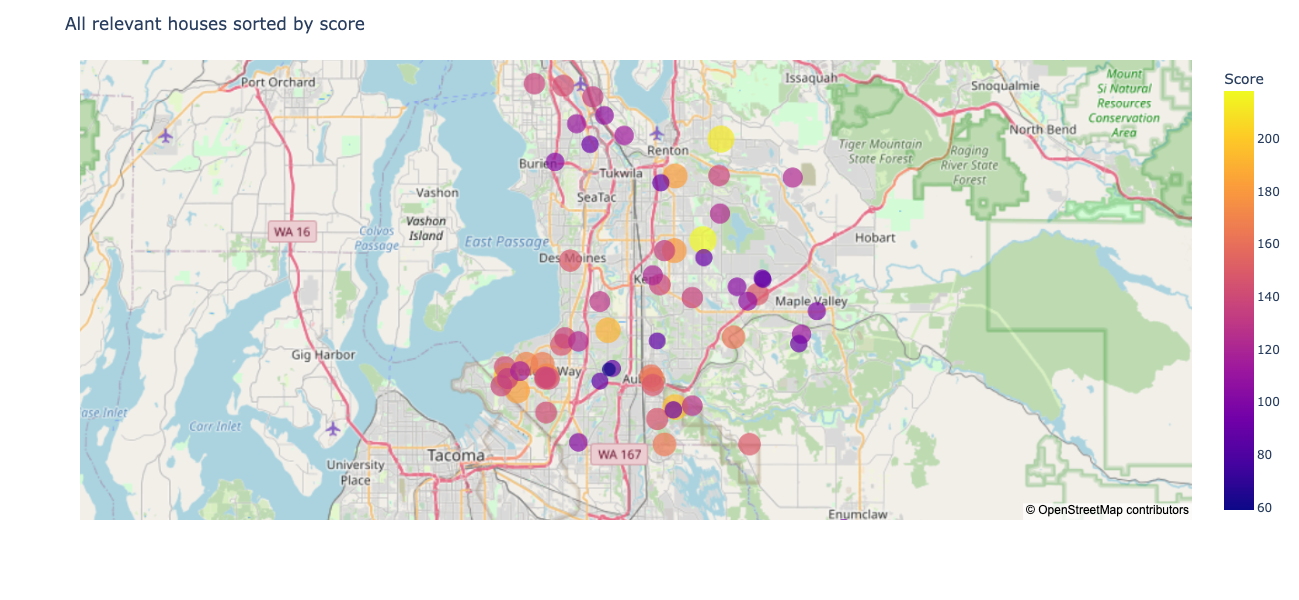

In [579]:
# Create a map with plotly for relevant houses
fig = px.scatter_mapbox(grading, lat="lat", lon="long", hover_name="House", 
                        hover_data={"lat":False, 'long':False, "price":True, "grade":True, "condition":True, "bedrooms":True, "bathrooms":True, 
                                 "floors":True, "sqft_living":True, "sqft_lot":True, }, 
                        width=1000, height=600, zoom=9.3, size="Score", color='Score')
fig.update_layout(mapbox_style="open-street-map", title="All relevant houses sorted by score")
fig.update_geos(fitbounds="locations")
fig.show()

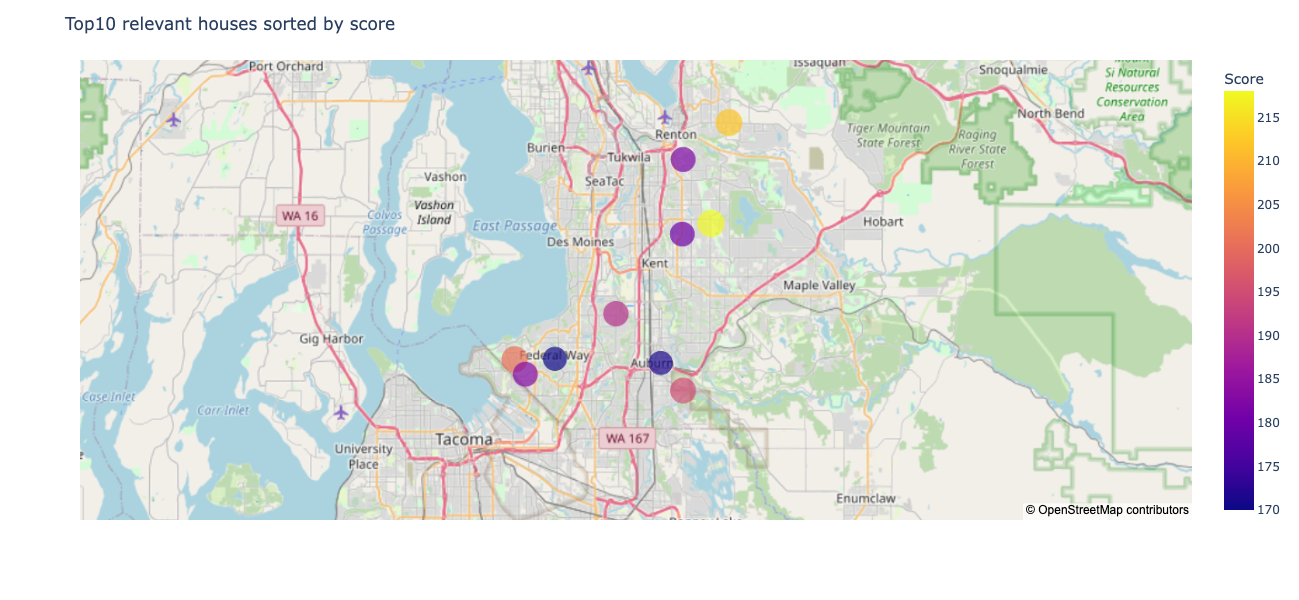

In [577]:
#Create a map with plotly for top10
fig = px.scatter_mapbox(top10, lat="lat", lon="long", hover_name="House", 
                        hover_data={"lat":False, 'long':False, "price":True, "grade":True, "condition":True, "bedrooms":True, "bathrooms":True, 
                                 "floors":True, "sqft_living":True, "sqft_lot":True, }, 
                        width=1000, height=600, zoom=9.3, size="Score", color='Score')
fig.update_layout(mapbox_style="open-street-map", title="Top10 relevant houses sorted by score")
fig.update_geos(fitbounds="locations")
fig.show()

## Comparison between houses
If our stakeholder would like to get some additional information, we prepared several plots.

Here you can find a general overview for all 66 houses and below that for our top10 created as histograms.

How many of the found houses:
- are in which condition?
- have what grade?
- have how much square foot of living space?
- have how many bedrooms?
- have how many bathrooms?
- have how much square foot of lot space?

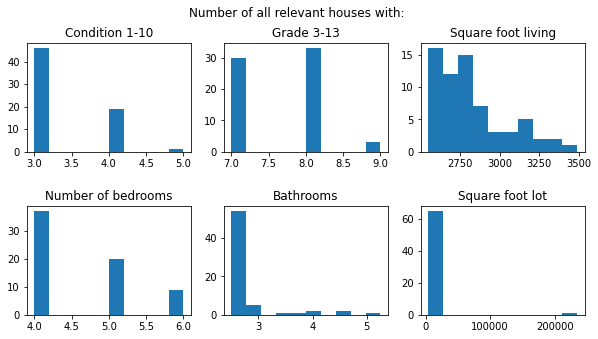

In [561]:
#Plot it
fig, axs = plt.subplots(2, 3, figsize=(10,5))
axs[0][0].hist(grading["condition"])
axs[0][1].hist(grading["grade"])
axs[0][2].hist(grading["sqft_living"])
axs[1][0].hist(grading["bedrooms"])
axs[1][1].hist(grading["bathrooms"])
axs[1][2].hist(grading["sqft_lot"])

axs[0][0].set_title('Condition 1-10')
axs[0][1].set_title('Grade 3-13')
axs[0][2].set_title('Square foot living')
axs[1][0].set_title('Number of bedrooms')
axs[1][1].set_title('Bathrooms')
axs[1][2].set_title('Square foot lot')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
fig.suptitle('Number of all relevant houses with:');

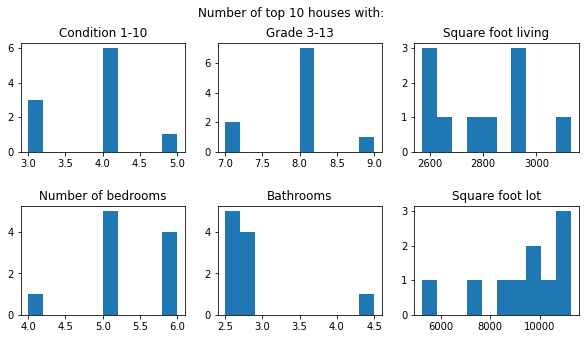

In [562]:
#Plot it
fig, axs = plt.subplots(2, 3, figsize=(10,5))
axs[0][0].hist(top10["condition"])
axs[0][1].hist(top10["grade"])
axs[0][2].hist(top10["sqft_living"])
axs[1][0].hist(top10["bedrooms"])
axs[1][1].hist(top10["bathrooms"])
axs[1][2].hist(top10["sqft_lot"])

axs[0][0].set_title('Condition 1-10')
axs[0][1].set_title('Grade 3-13')
axs[0][2].set_title('Square foot living')
axs[1][0].set_title('Number of bedrooms')
axs[1][1].set_title('Bathrooms')
axs[1][2].set_title('Square foot lot')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
fig.suptitle('Number of top 10 houses with:');

## Top10 data
We would like to get a better overview for our top10.
What is the individual data for each house:
- grade
- condition
- bedrooms
- bathrooms

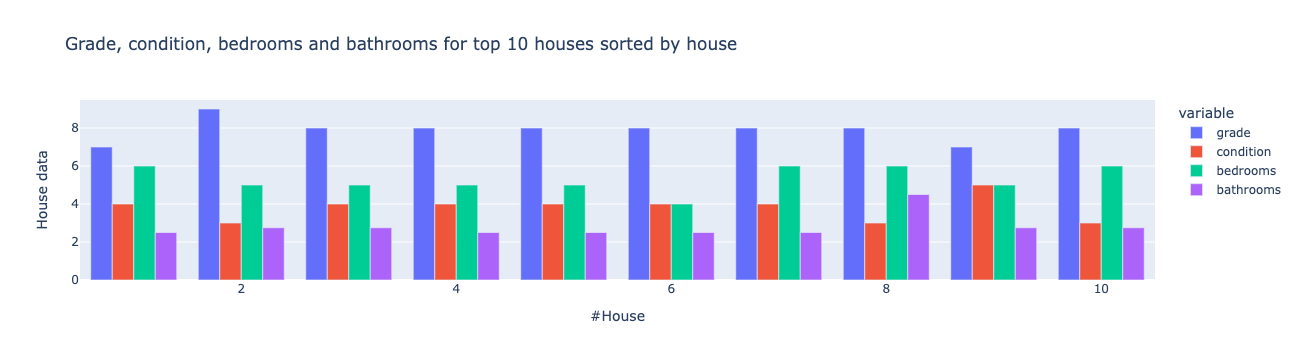

In [576]:
#Plot House data from top10
fig = px.bar(top10, x="House", y=["grade", "condition", "bedrooms", "bathrooms"], barmode='group',
             labels={
                     "House": "#House",
                     "value": "House data"},
             title="Grade, condition, bedrooms and bathrooms for top 10 houses sorted by house")      
fig.show()


## Neighbourhood
What about the neighbours of our top10?
Here we find the average grade and condition of house within the same zipcode.

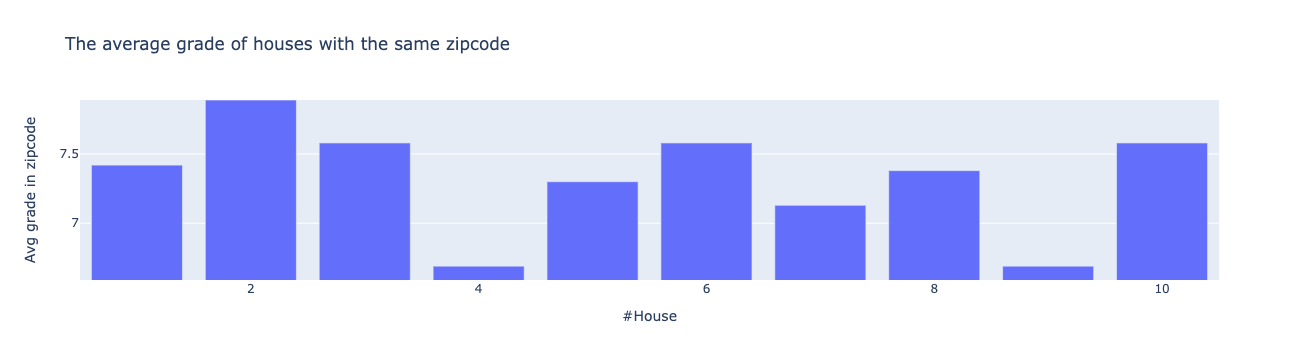

In [581]:
#Plot Neighbourhood data from top10
#mingrade = top10["grade_mean"].describe("min")
mingrade = top10['grade_mean'].describe()["min"]- 0.1

fig = px.bar(top10, x="House", y=["grade_mean"],
             
             labels={
                     "House": "#House",
                     "value": "Avg grade in zipcode"},
             
             title="The average grade of houses with the same zipcode"
             
    )
fig.update_layout(yaxis_range=[mingrade, top10['grade_mean'] .describe()["max"]], showlegend=False)
fig.show()

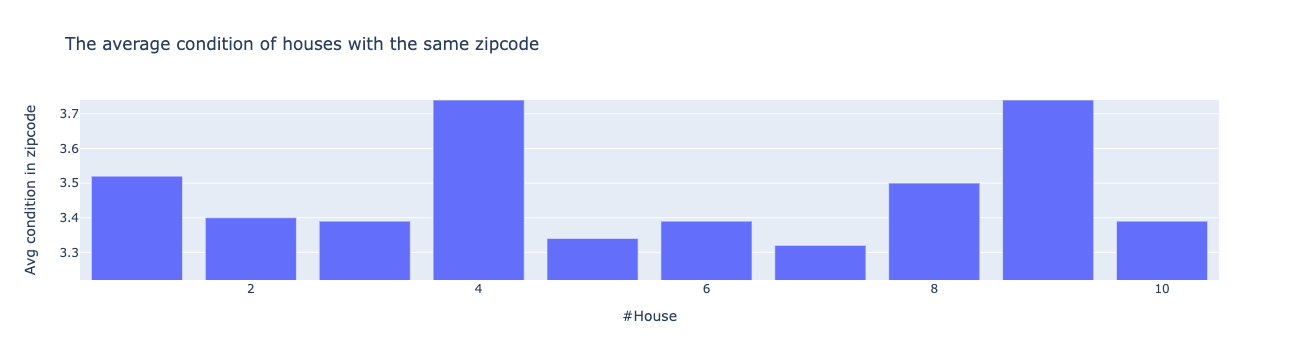

In [566]:
#Plot Neighbourhood data from top5

#Setting a variable a little less than minimum of condition mean
mincondition = top10['condition_mean'].describe()["min"]- 0.1

fig = px.bar(top10, x="House", y=["condition_mean"], 
             
             labels={
                     "House": "#House",
                     "value": "Avg condition in zipcode"},
             
             title="The average condition of houses with the same zipcode",
             
    
            )  

#Update Y-axis range to Minimum and Maximum of Condition Mean
fig.update_layout(yaxis_range=[mincondition, top10['condition_mean'].describe()["max"]], 
                               showlegend=False)

fig.show()

# Summary
- we created filters relevant for our stakeholder Thomas Hansen. The filtered list contained 66 houses
- we created a scoring system for these 66 houses
- according to ther scoring we created a top 10
- we plotted the 66 houses and top 10 houses on a map, incl. relevant hover data
- as additional information, we plotted 
    - histograms for relevant data of all 66 and top 10 houses
    - bar charts for most important information for each of the top 10 houses
    - some neighbourhood bar charts about the average grade and condition of houses in zśame zip code for the top 10

With this data, Thomas Hansen should be able to pick a house.
We recommend to use the map, sorted by score, and additionally have a look at the area of the house

## Ideas for possible next steps
- the scoring system could be used for other stakeholders. Therefore a Python scrypt could be created, which asks for input (e.g. # of bedrooms, price limit, ...) and plots as output
- additional values could be included within the scoring system, such as: 
    - sqft_living
    - sqft_lot
    - floors
    - area / zip